## Testing predictions

In [4]:
#lib imports
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

#project imports
from image_processing import prepare_image_for_prediction, process_image

In [5]:
MODEL_NAME = 'cnn_mediapipe_medium_ckp.keras'
models_dir = './models_mediapipe'
model_path = os.path.join(models_dir, MODEL_NAME)
model = tf.keras.models.load_model(model_path)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 222, 222, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 109, 109, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 52, 52, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     4,718,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,749,387 (56.26 MB)

 Trainable params: 4,916,099 (18.75 MB)

 Non-trainable params: 1,088 (4.25 KB)

 Optimizer params: 9,832,200 (37.51 MB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
[[0.5250832  0.47333688 0.00157991]]
paper


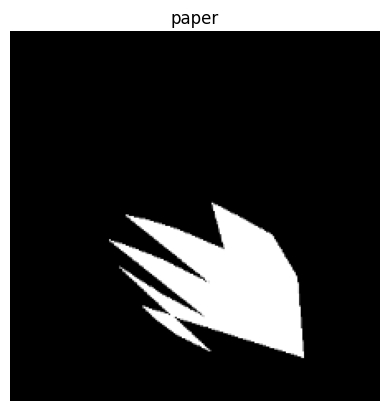

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[[0.0890526  0.8850611  0.02588635]]
rock


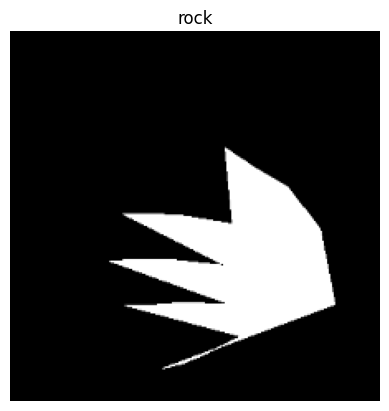

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[[6.0613021e-02 9.3895048e-01 4.3648906e-04]]
rock


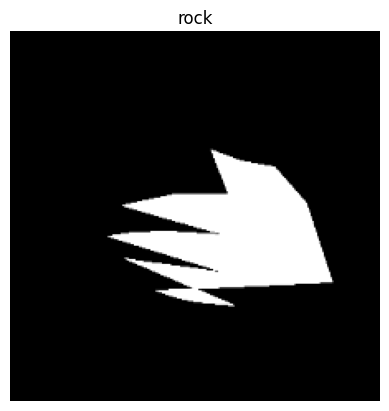

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
[[0.63660586 0.35576594 0.00762823]]
paper


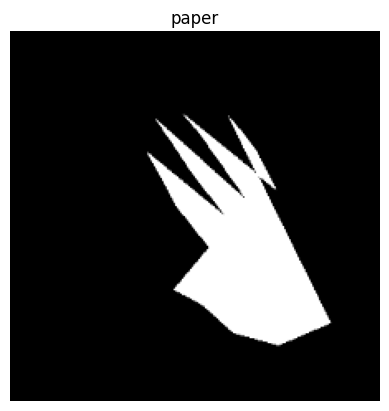

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[[0.04138378 0.9541868  0.00442947]]
rock


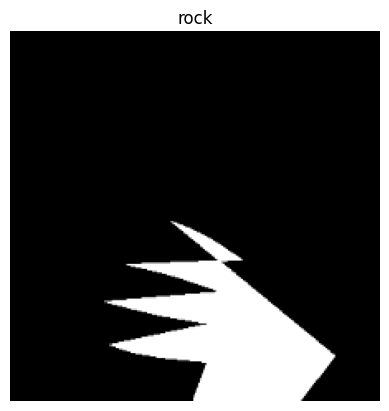

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[[0.11055922 0.8811435  0.0082973 ]]
rock


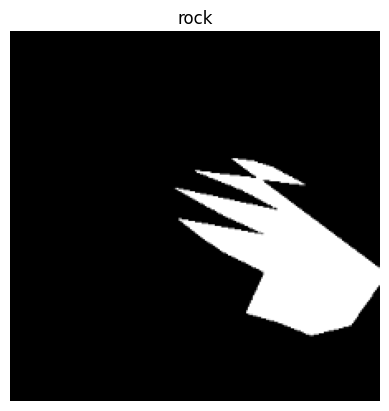

In [6]:
PREDICT_WHOLE_DIR = True
PREDICT_IMAGES = []
GRAYSCALE = True

classes = ['paper', 'rock', 'scissors']
predict_dir = 'predict_images'

if not os.path.exists(predict_dir):
    os.makedirs(predict_dir)

if PREDICT_WHOLE_DIR:
    predict_images = os.listdir(predict_dir)
else:
    predict_images = PREDICT_IMAGES
    
for img_name in predict_images:
    img_path = os.path.join(predict_dir, img_name)
    if not os.path.exists(img_path):
        print(f'Image {img_path} does not exist')
        continue
    
    prepared_image = process_image(img_path)
    if prepared_image is None:
        print(f'No hand detected in image {img_path}')
        continue
    prediction = model.predict(prepared_image)
    
    print(prediction)
    predicted_class = classes[np.argmax(prediction)]
    print(predicted_class)
    if GRAYSCALE:
        plt.imshow(prepared_image[0, :, :, 0], cmap='gray')
    else:
        plt.imshow(prepared_image[0])
    plt.title(predicted_class)
    plt.axis('off')
    plt.show()